<a href="https://colab.research.google.com/github/buithanhdam/ProjectMachineLearning23/blob/main/ProjectML23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries and drive

In [87]:
#libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import SelectFromModel
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score 
from sklearn import metrics
from sklearn.neural_network import MLPClassifier

In [2]:
# connect gg drive
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/Colab Notebooks'

Mounted at /content/gdrive
/content/gdrive/MyDrive/Colab Notebooks


Get dataset from gg drive


In [ ]:
#Mô tả dữ liệu
# Dữ liệu dataset Paramount+ Movies and Tv Shows
# Dữ liệu gồm có 3181 Mẫu
# mỗi mẫu dữ liệu gồm có 15 đặc trưng
# + id , tilte , type, description,	age_certification, release year,runtime, genres, production_countries, seasons, imdbid, imdb score, imdb votes, tmdb popularity, tmdb scores
# trong đó có 2 đặc trưng kiểu int64 Release year,runtime
# 5 đặc trưng kiểu float64 imdb_score , tmdb_popularity, tmdb_scores,seasons,imdb_votes
# 8 đặc trưng chứa dạng string: id , tilte , type, description,	age_certification,	age_certification (có 2 đặc trưng dạng mảng genres và production_countries )
# các mẫu dữ liệu còn thiếu các đặc trưng có dạng (null và NaN)
# Các vấn đề cần giải quyết xữ lý dữ liệu bị thiếu , loại bỏ  dặc trưng không cần thiết và feature selection(missing và feature selection)

In [3]:
df = pd.read_csv('paramount+.csv')
df.tail(15)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
3167,ts369971,Yoga Friends,SHOW,NOGGIN's Yoga Friends helps students practice ...,2022,NaN,1,['family'],[],1.0,tt22208486,NaN,NaN,NaN,NaN
3168,tm875741,Funny Face,MOVIE,The destruction of his grandparents' home lead...,2021,NaN,95,"['crime', 'drama', 'romance', 'thriller']",['US'],NaN,tt11638942,5.2,579.0,NaN,NaN
3169,ts373298,Pickled,SHOW,Sixteen celebrities compete in a pickleball to...,2022,NaN,88,[],[],1.0,NaN,NaN,NaN,NaN,NaN
3170,ts324789,Nick News,SHOW,Nick News- is a platform TO INFORM AND INSPIRE...,2021,TV-G,24,[],[],3.0,tt16450828,NaN,NaN,NaN,NaN
3171,tm1244765,Reclaiming History: Our Native Daughters,MOVIE,NaN,2021,NaN,44,['documentation'],[],NaN,tt21342466,NaN,NaN,NaN,NaN
3172,ts291097,Disrupt & Dismantle with Soledad O'Brien,SHOW,NaN,2021,TV-MA,40,['documentation'],[],1.0,tt14315936,4.3,18.0,NaN,NaN
3173,ts313367,Wolf Pack,SHOW,A teenage boy and girl get their lives changed...,2023,TV-MA,50,"['drama', 'fantasy', 'horror', 'scifi']",['US'],1.0,tt15487922,6.2,4183.0,267.800,8.206
3174,ts378183,School Spirits,SHOW,"Maddie, a teen stuck in the afterlife investig...",2023,TV-MA,0,['drama'],['US'],1.0,tt21057450,NaN,NaN,33.040,9.000
3175,tm1238886,Teen Wolf: The Movie,MOVIE,"The wolves are howling once again, as a terrif...",2023,R,140,"['action', 'fantasy', 'comedy', 'drama', 'roma...",['US'],NaN,tt15613268,5.6,10150.0,354.784,7.905
3176,tm1285862,At Midnight,MOVIE,Alejandro's life is disrupted when actress Sop...,2023,R,100,"['comedy', 'romance']","['US', 'MX']",NaN,tt14874302,5.5,864.0,21.746,5.729


Generate data , data chart


In [ ]:
df.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,3182.000000,3182.000000,664.000000,2975.000000,2.972000e+03,3134.000000,2744.000000
mean,1993.174104,74.806411,3.977410,6.067160,2.525229e+04,13.443530,6.084723
std,30.639396,31.113905,5.264735,1.276696,1.003005e+05,44.952654,1.448689
min,1912.000000,0.000000,1.000000,1.400000,5.000000e+00,0.009442,1.000000
25%,1970.000000,50.000000,1.000000,5.300000,1.710000e+02,1.400000,5.200000
50%,2009.000000,81.000000,2.000000,6.100000,6.990000e+02,3.142500,6.100000
75%,2017.000000,95.000000,5.000000,7.000000,5.453500e+03,9.766500,7.000000
max,2023.000000,353.000000,50.000000,9.300000,1.870426e+06,1150.383000,10.000000


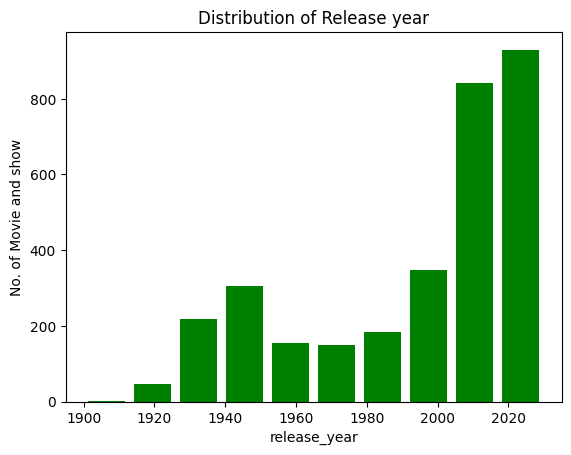

In [ ]:
# RELEASE YEAR histogram
x_values = df['release_year']
plt.xlabel('release_year')


plt.ylabel('No. of Movie and show')

plt.title('Distribution of Release year')

range = (1900, 2030) 
bins = 10 
 
plt.hist(x_values, bins, range, color='green',histtype='bar',rwidth=0.8)

plt.show()

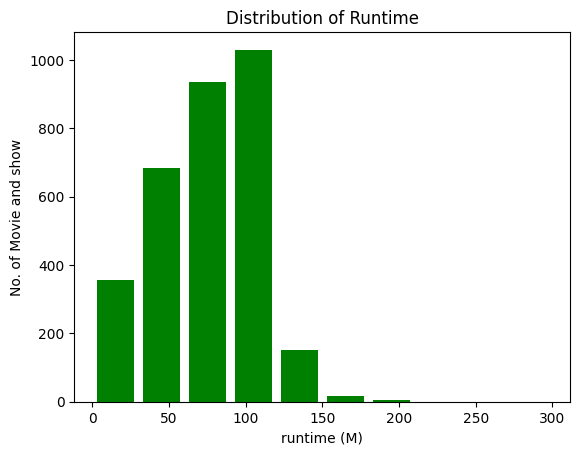

In [ ]:
# RUNTIME histogram
x_values = df['runtime']
plt.xlabel('runtime (M)')


plt.ylabel('No. of Movie and show')

plt.title('Distribution of Runtime')

range = (0, 300) 
bins = 10 
 
plt.hist(x_values, bins, range, color='green',histtype='bar',rwidth=0.8)

plt.show()

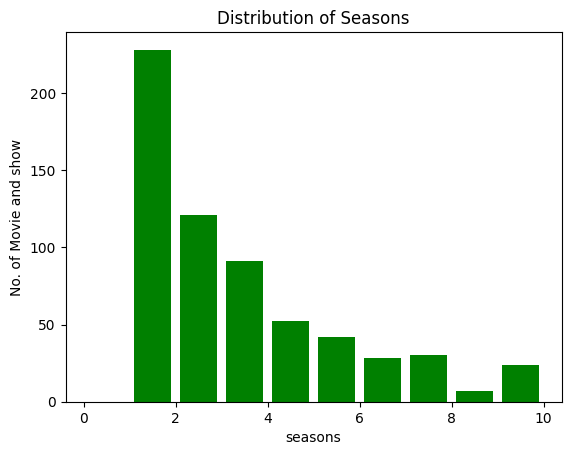

In [ ]:
# SEASONS histogram
x_values = df['seasons']
plt.xlabel('seasons')


plt.ylabel('No. of Movie and show')

plt.title('Distribution of Seasons')

range = (0, 10) 
bins = 10 
 
plt.hist(x_values, bins, range, color='green',histtype='bar',rwidth=0.8)

plt.show()

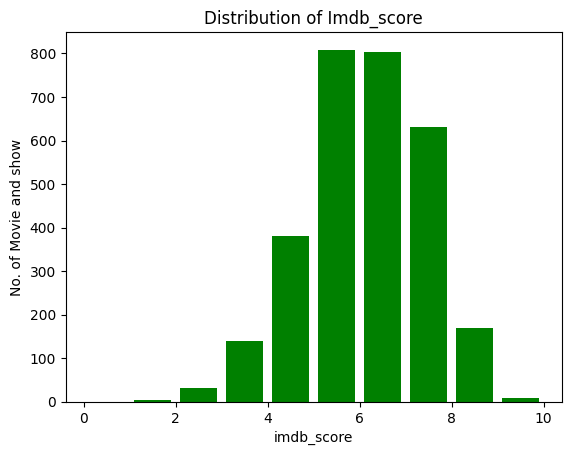

In [ ]:
# IMDB SCORE histogram
x_values = df['imdb_score']
plt.xlabel('imdb_score')


plt.ylabel('No. of Movie and show')

plt.title('Distribution of Imdb_score')

range = (0, 10) 
bins = 10 
 
plt.hist(x_values, bins, range, color='green',histtype='bar',rwidth=0.8)

plt.show()

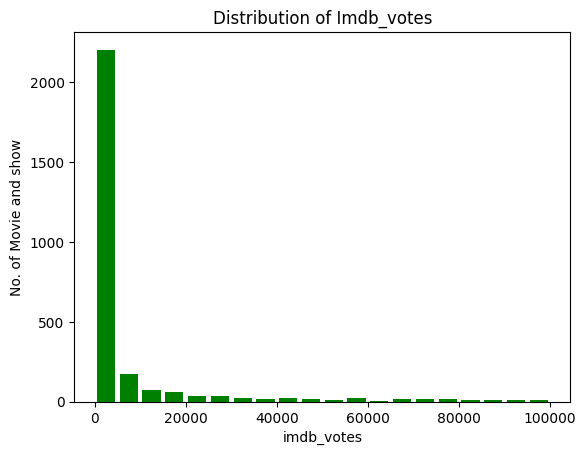

In [ ]:

# IMDB VOTES histogram
x_values = df['imdb_votes']
plt.xlabel('imdb_votes')


plt.ylabel('No. of Movie and show')

plt.title('Distribution of Imdb_votes')

range = (0, 100000) 
bins = 20 
 
plt.hist(x_values, bins, range, color='green',histtype='bar',rwidth=0.8)

plt.show()

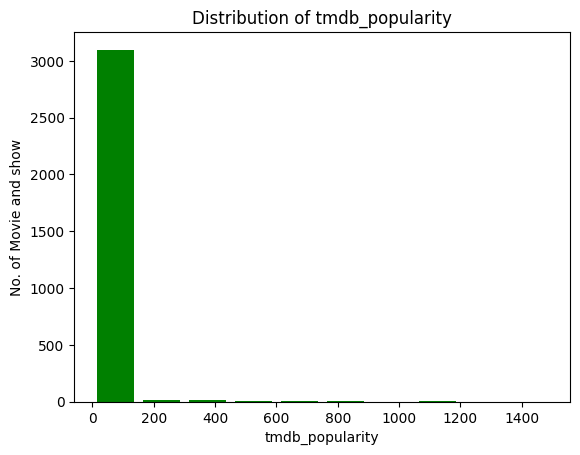

In [ ]:



# tmdb_popularity histogram
x_values = df['tmdb_popularity']
plt.xlabel('tmdb_popularity')


plt.ylabel('No. of Movie and show')

plt.title('Distribution of tmdb_popularity')

range = (0, 1500) 
bins = 10 
 
plt.hist(x_values, bins, range, color='green',histtype='bar',rwidth=0.8)

plt.show()

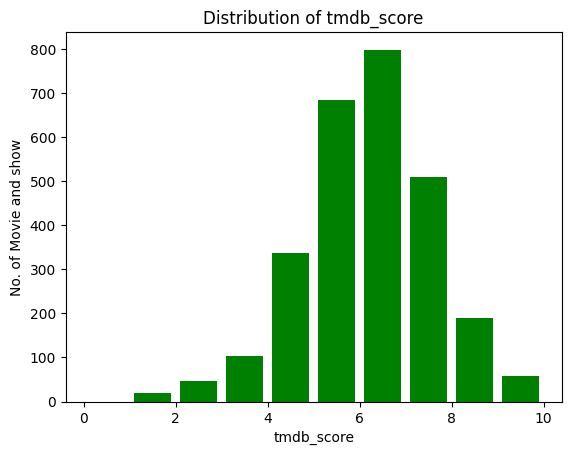

In [ ]:
# tmdb_score histogram
x_values = df['tmdb_score']
plt.xlabel('tmdb_score')


plt.ylabel('No. of Movie and show')

plt.title('Distribution of tmdb_score')

range = (0, 10) 
bins = 10 
 
plt.hist(x_values, bins, range, color='green',histtype='bar',rwidth=0.8)

plt.show()

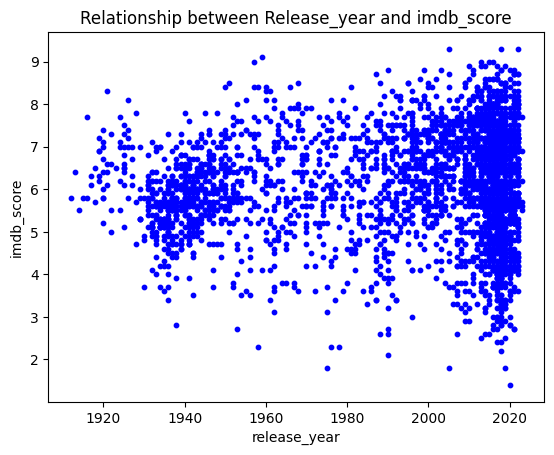

In [ ]:
x_values = df['release_year']
plt.xlabel('release_year')

y_values = df['imdb_score']
plt.ylabel('imdb_score')

plt.title('Relationship between Release_year and imdb_score')

plt.scatter(x_values, y_values, s=10, color="blue")
plt.show() 

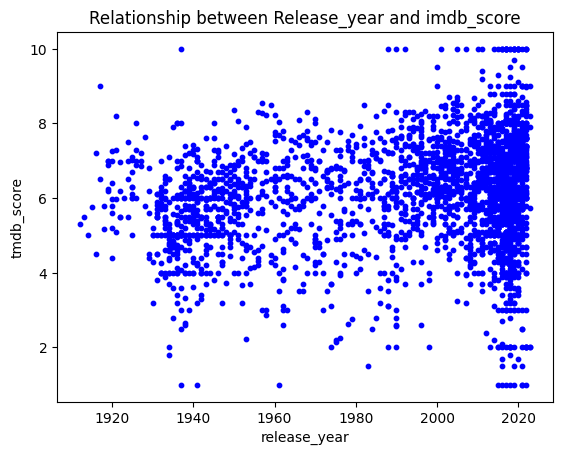

In [ ]:
x_values = df['release_year']
plt.xlabel('release_year')

y_values = df['tmdb_score']
plt.ylabel('tmdb_score')

plt.title('Relationship between Release_year and imdb_score')

plt.scatter(x_values, y_values, s=10, color="blue")
plt.show() 


In [99]:
#Tiền xử lý dữ liệu missing và feature selection
test = df.tail(15)

datasetA= df
# missing numeric data
imputer = SimpleImputer(missing_values=np.nan,  strategy='mean',fill_value=None, 
verbose=0, copy=True, add_indicator=False)
# release_year missing
testm = datasetA[['release_year']]
dr =  imputer.fit_transform(testm)

datasetA[['release_year']] = dr

# seasons missing
testm = datasetA[['seasons']]
dr =  imputer.fit_transform(testm)

datasetA[['seasons']] = dr
# imdb_score missing
testm = datasetA[['imdb_score']]
dr =  imputer.fit_transform(testm)

datasetA[['imdb_score']] = dr
# imdb_votes missing
testm = datasetA[['imdb_votes']]
dr =  imputer.fit_transform(testm)

datasetA[['imdb_votes']] = dr
# tmdb_popularity missing
testm = datasetA[['tmdb_popularity']]
dr =  imputer.fit_transform(testm)

datasetA[['tmdb_popularity']] = dr
# tmdb_score missing
testm = datasetA[['tmdb_score']]
dr =  imputer.fit_transform(testm)

datasetA[['tmdb_score']] = dr

# fix missing data string
#string data
imputer = SimpleImputer(missing_values=np.nan,  strategy='most_frequent',fill_value=None, 
verbose=0, copy=True, add_indicator=False)
# type missing
testm = datasetA[['type']]
dr =  imputer.fit_transform(testm)

datasetA[['type']] = dr
# missing age certification
testm = datasetA[['age_certification']]
dr =  imputer.fit_transform(testm)

datasetA[['age_certification']] = dr
# missing description
testm = datasetA[['description']]
dr =  imputer.fit_transform(testm)

datasetA[['description']] = dr
#missing genres
df[['genres']] = df[['genres']].replace(['[]'], "['drama']")

#missing production_countries
df[['production_countries']] = df[['production_countries']].replace(['[]'], "['US']")

datasetA.tail(15)

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:382: FutureWarning: The 'verbose' parameter was deprecated in version 1.1 and will be removed in 1.3. A warning will always be raised upon the removal of empty columns in the future version.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:382: FutureWarning: The 'verbose' parameter was deprecated in version 1.1 and will be removed in 1.3. A warning will always be raised upon the removal of empty columns in the future version.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:382: FutureWarning: The 'verbose' parameter was deprecated in version 1.1 and will be removed in 1.3. A warning will always be raised upon the removal of empty columns in the future version.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:382: FutureWarning: The 'verbose' parameter was deprecated in version 1.1 and will be removed in 1.3. A warning will alw

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
3167,ts369971,Yoga Friends,SHOW,NOGGIN's Yoga Friends helps students practice ...,2022.0,R,1,['family'],['US'],1.00000,tt22208486,6.06716,25252.290377,13.44353,6.084723
3168,tm875741,Funny Face,MOVIE,The destruction of his grandparents' home lead...,2021.0,R,95,"['crime', 'drama', 'romance', 'thriller']",['US'],3.97741,tt11638942,5.20000,579.000000,13.44353,6.084723
3169,ts373298,Pickled,SHOW,Sixteen celebrities compete in a pickleball to...,2022.0,R,88,['drama'],['US'],1.00000,NaN,6.06716,25252.290377,13.44353,6.084723
3170,ts324789,Nick News,SHOW,Nick News- is a platform TO INFORM AND INSPIRE...,2021.0,TV-G,24,['drama'],['US'],3.00000,tt16450828,6.06716,25252.290377,13.44353,6.084723
3171,tm1244765,Reclaiming History: Our Native Daughters,MOVIE,Wilbur the pig is scared of the end of the sea...,2021.0,R,44,['documentation'],['US'],3.97741,tt21342466,6.06716,25252.290377,13.44353,6.084723
3172,ts291097,Disrupt & Dismantle with Soledad O'Brien,SHOW,Wilbur the pig is scared of the end of the sea...,2021.0,TV-MA,40,['documentation'],['US'],1.00000,tt14315936,4.30000,18.000000,13.44353,6.084723
3173,ts313367,Wolf Pack,SHOW,A teenage boy and girl get their lives changed...,2023.0,TV-MA,50,"['drama', 'fantasy', 'horror', 'scifi']",['US'],1.00000,tt15487922,6.20000,4183.000000,267.80000,8.206000
3174,ts378183,School Spirits,SHOW,"Maddie, a teen stuck in the afterlife investig...",2023.0,TV-MA,0,['drama'],['US'],1.00000,tt21057450,6.06716,25252.290377,33.04000,9.000000
3175,tm1238886,Teen Wolf: The Movie,MOVIE,"The wolves are howling once again, as a terrif...",2023.0,R,140,"['action', 'fantasy', 'comedy', 'drama', 'roma...",['US'],3.97741,tt15613268,5.60000,10150.000000,354.78400,7.905000
3176,tm1285862,At Midnight,MOVIE,Alejandro's life is disrupted when actress Sop...,2023.0,R,100,"['comedy', 'romance']","['US', 'MX']",3.97741,tt14874302,5.50000,864.000000,21.74600,5.729000


In [100]:
#loại bỏ các cột không cần thiết id movie , id imdb
datasetA = datasetA.drop(columns=['id', 'imdb_id'])
# chuyển dữ liệu dạng số học

scaler = StandardScaler();
datasetA[['release_year','runtime', 'seasons', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score']] = scaler.fit_transform(datasetA[['release_year','runtime', 'seasons', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score']])
# print(datasetA[['release_year','runtime', 'seasons', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score']])
# chuyển dữ liệu dạng string phân nhãn
encode_cols = ['type', 'age_certification', 'genres', 'production_countries']

gle = LabelEncoder()
genre_labels = gle.fit_transform(datasetA[['type']])
datasetA['type'] = genre_labels

gle = LabelEncoder()
genre_labels = gle.fit_transform(datasetA[['age_certification']])
datasetA['age_certification'] = genre_labels

gle = LabelEncoder()
genre_labels = gle.fit_transform(datasetA[['genres']])
datasetA['genres'] = genre_labels

gle = LabelEncoder()
genre_labels = gle.fit_transform(datasetA[['production_countries']])
datasetA['production_countries'] = genre_labels

datasetA


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,Sunset Boulevard,0,A hack screenwriter writes a screenplay for a ...,-1.409326,2,1.131299,593,150,1.847936e-16,1.890066,2.057943e+00,0.111814,1.696055
1,His Girl Friday,0,"Hildy, the journalist former wife of newspaper...",-1.735754,4,0.552688,517,150,1.847936e-16,1.403946,3.610444e-01,0.029491,1.002400
2,Red River,0,Headstrong Thomas Dunson starts a thriving Tex...,-1.474611,4,1.870634,986,150,1.847936e-16,1.403946,7.178964e-02,-0.023395,0.977866
3,The General,0,"During America’s Civil War, Union spies steal ...",-2.192754,4,0.134803,191,150,1.847936e-16,1.647006,6.983501e-01,-0.025278,1.430637
4,The Kid,0,A tramp cares for a boy after he's abandoned a...,-2.355968,4,-0.218792,202,150,1.847936e-16,1.809046,1.061141e+00,0.031868,1.581561
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3177,Sometimes When We Touch,1,"The untold story of soft rock, whose artists d...",0.973602,7,-0.861693,375,150,-1.238955e+00,1.322927,-2.596142e-01,-0.204046,-3.036858
3178,FBI True,1,Takes viewers behind the scenes of the most co...,0.973602,5,-1.633173,462,150,-1.238955e+00,0.674767,-2.602952e-01,-0.132553,0.000000
3179,Lingo,1,Host RuPaul Charles brings his one-of-a-kind p...,0.973602,4,-1.054563,741,150,-1.238955e+00,-0.297473,-2.597689e-01,-0.239715,-3.036858
3180,World's Most Dangerous Shark?,0,"The Great White has a scary reputation, but Ex...",0.973602,3,-0.990273,392,150,1.847936e-16,0.000000,-3.753666e-17,-0.265003,0.000000


In [101]:
datasetB = datasetA.drop(columns=['title', 'description'])

In [102]:
# phân chia tập train test
xlabel = ['type', 'age_certification', 'genres', 'production_countries','release_year','runtime', 'seasons','imdb_score', 'imdb_votes', 'tmdb_popularity']
ylabel =['tmdb_score']

xtrain = datasetB[xlabel]
ytrain = datasetB[ylabel]
ytrain = np.asarray( ytrain, dtype="|S6")
print(xtrain)
print(ytrain)

      type  age_certification  genres  production_countries  release_year  \
0        0                  2     593                   150     -1.409326   
1        0                  4     517                   150     -1.735754   
2        0                  4     986                   150     -1.474611   
3        0                  4     191                   150     -2.192754   
4        0                  4     202                   150     -2.355968   
...    ...                ...     ...                   ...           ...   
3177     1                  7     375                   150      0.973602   
3178     1                  5     462                   150      0.973602   
3179     1                  4     741                   150      0.973602   
3180     0                  3     392                   150      0.973602   
3181     0                  4     392                   150      0.973602   

       runtime       seasons  imdb_score    imdb_votes  tmdb_popularity  
0

In [103]:
#Neural networking
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(100,50), random_state=1)

# sfm = SelectFromModel(clf, threshold=(.8 * (1 - .8))) # sử dụng feature select SelectFromModel nếu cần

x_train, x_test, y_train, y_test = train_test_split(xtrain,ytrain, test_size = 0.3, random_state = 1)

clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

accMLP =  accuracy_score(y_test, y_pred)
preMLP= metrics.precision_score(y_test, y_pred,average='macro')

recallMLP= metrics.recall_score(y_test, y_pred,average='macro')
f1MLP = metrics.f1_score(y_test, y_pred,average='macro') 

print(accMLP)
print(preMLP)
print(recallMLP)
print(f1MLP)



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.13612565445026178
0.0004677857541246109
0.003436426116838488
0.0008234753828368726


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
